<a href="https://colab.research.google.com/github/kunal077/Stochastic_Processes_Algorithms/blob/main/M_M_1_Queue_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter time for simulation (Hours): 6
Enter Job Arrival Rate (/Hour): 25
Enter Job Service Rate (/Hour): 30


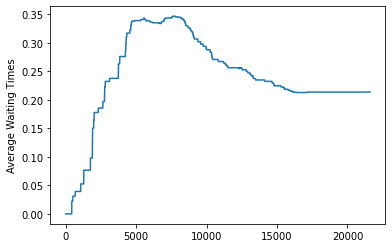

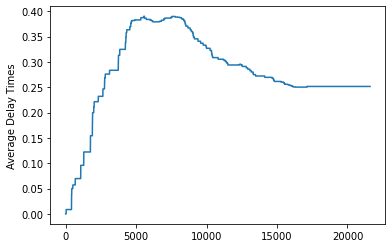

In [ ]:
import numpy as np
import queue
import copy
import matplotlib.pyplot as plt
 
# Input Parameters
total_time = int(input("Enter time for simulation (Hours): "))
IAT_rate = int(input("Enter Job Arrival Rate (/Hour): "))
ST_rate = int(input("Enter Job Service Rate (/Hour): "))
rho = IAT_rate/ST_rate
 
 
# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
 
num_processes = int(np.random.poisson(IAT_rate)* total_time)
num_processes_served = 0
 
# Populate Inter-Arrival-Times (IAT)
for i in range(num_processes):
    temp = np.random.exponential(1/IAT_rate)*60*60
    if i==0:
        IAT.append(0)
    else:
        IAT.append(int(temp - temp%1))
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))
 
# Save a copy of ST
ST_copy = copy.deepcopy(ST)
 
# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)
 
# Simulation of M/M/1 Queue (i represents current time)
 
for i in range(total_time*60*60):    
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1
 
    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)
 
    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
 
 
    sum_wait = 0
    sum_delay = 0
 
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))
 
plt.plot([i+1 for i in range(total_time*60*60)], list_wait)
plt.ylabel("Average Waiting Times")
plt.show()
 
plt.plot([i+1 for i in range(total_time*60*60)], list_delay)
plt.ylabel("Average Delay Times")
plt.show()